# Thesis Title (Suggestion)

"Survival Analysis of Hospitalized Patients Using HCUP Data: Predictors of Mortality and Application of the Cox Proportional Hazards Model"

# Abstract (Executive Summary):

This study investigates the survival outcomes of hospitalized patients using the Healthcare Cost and Utilization Project (HCUP) database. The primary objective was to identify significant predictors of mortality and to evaluate their impact on survival time using Kaplan-Meier estimation and Cox Proportional Hazards (CoxPH) modeling. The study demonstrated that admission type and length of stay were significant predictors of mortality, while demographic factors such as age, sex, and race showed no significant association. The proportional hazards assumption was validated, confirming the suitability of the CoxPH model for this analysis.





## 1. Survival Analysis Core Variables

| Variable        | Meaning                                            | Role in Model   | Keep?   | Reason                                    |
|----------------|----------------------------------------------------|-----------------|---------|-------------------------------------------|
| daystoevent     | Time from admission to event or censoring         | Time-to-event   | YES     | Essential survival time                  |
| died            | Event indicator (1=Death, 0=Alive/Censored)       | Event status    | YES     | Required for survival outcome            |

---

## 2. Patient Demographics (Covariates)

| Variable        | Meaning                            | Keep?   | Reason                                        |
|----------------|------------------------------------|---------|-----------------------------------------------|
| age, ageday, agemonth | Patient Age                  | YES     | Adjust for age effect                        |
| female          | Sex/Gender                        | YES     | Known survival factor                        |
| race            | Race/Ethnicity                   | YES     | For disparity analysis                       |
| hispanic        | Hispanic Ethnicity               | YES     | Important social factor                      |
| marital_status  | Marital Status                  | Optional| If social variable analysis is needed        |
| medincstq / zipinc_qrtl | Income Proxy via ZIP      | YES     | Socioeconomic status                        |
| hospst          | State of Hospital                 | Optional| Regional effect                              |
| primlang        | Primary Language                 | Optional| Social determinant of health                 |

---

## 3. Hospital / Admission Characteristics

| Variable        | Meaning                            | Keep?   | Reason                                      |
|----------------|------------------------------------|---------|---------------------------------------------|
| atype           | Admission Type                    | YES     | Emergency vs Elective impact                |
| aweekend        | Weekend Admission                 | Optional| Weekend effect on survival                 |
| los             | Length of Stay                    | YES     | Severity proxy or outcome variable         |
| mdc             | Major Diagnostic Category         | Optional| Stratify analysis                          |
| drg / drgver    | Diagnosis Related Group + Version| Optional| Categorical grouping                       |
| dshospid        | Hospital ID                      | YES     | For clustering or multi-level model        |

---

## 4. Diagnosis & Comorbidities

| Variable        | Meaning                           | Keep?   | Reason                                      |
|----------------|-----------------------------------|---------|---------------------------------------------|
| dxpoa1 - dxpoa60| Diagnosis Present on Admission   | YES     | Comorbidity adjustment (Charlson, Elixhauser)|
| cir007, dig004, neo051, neo070 | Specific Diagnosis Flags | Optional| If relevant to cancer or other conditions |

---

## 5. Geography

| Variable        | Meaning                            | Keep?   | Reason                                      |
|----------------|------------------------------------|---------|---------------------------------------------|
| pl_cbsa, pl_nchs, pl_rucc, pl_uic, pl_ur_cat4 | Geographic Indicators | Optional | For regional variation analysis |

---

## 6. Others

| Variable        | Meaning                         | Keep?   | Reason                                       |
|----------------|---------------------------------|---------|----------------------------------------------|
| tran_in / tran_out | Transfer status              | Optional| For sensitivity analysis                     |
| visitlink        | Patient Linkage Across Years  | YES     | Essential for multiple admissions           |
| mrn_r            | Patient ID (encrypted)        | YES     | Optional if visitlink used                  |

---

# Final Recommended Variable List for HCUP Survival Analysis:

```python
selected_variables = [
    # Survival Core
    'daystoevent', 'died',

    # Demographics
    'age', 'ageday', 'agemonth', 'female', 'race', 'hispanic', 
    'marital_status', 'medincstq', 'zipinc_qrtl',

    # Hospital & Admission
    'atype', 'los', 'dshospid', 'mdc', 'drg', 'drgver',

    # Diagnosis
    'dxpoa1', 'dxpoa2', 'dxpoa3', # ... up to dxpoa60

    # Others
    'visitlink'
]
```

---

# Next Steps:
1. Clean and preprocess variables:
   - Age: Create `age` variable from `ageday`/`agemonth` if needed.
   - dxpoa: Generate comorbidity scores.
   - Handle missing values.

2. Model Survival:
   - Kaplan-Meier curves for groups (age group, sex, race).
   - Cox Proportional Hazard Model for multivariable analysis.
   - Optional: Stratified or multi-level models.



Perfect — here is the cleaned and finalized list of variables for *HCUP Survival Analysis* — only essential variables are kept.

---

## Final Variable Selection (Strict Survival Analysis)

### 1. Outcome Variables
| Variable   | Meaning                     |
|------------|-----------------------------|
| daystoevent | Time from admission to death/censoring |
| died        | Death status (1=Dead, 0=Alive/Censored) |

---

### 2. Patient Demographics
| Variable    | Meaning             |
|-------------|--------------------|
| age         | Patient Age        |
| ageday      | Patient Age in Days (for infants) |
| agemonth    | Patient Age in Months (for infants) |
| female      | Gender (0=Male, 1=Female) |
| race        | Race Category      |
| hispanic    | Hispanic Ethnicity |
| medincstq   | Income Proxy by State Quartile |
| zipinc_qrtl | Income Proxy by ZIP Quartile |

---

### 3. Hospital / Admission Characteristics
| Variable   | Meaning                 |
|------------|-------------------------|
| atype      | Admission Type         |
| los        | Length of Stay         |
| dshospid   | Hospital Identifier    |
| mdc        | Major Diagnostic Category |
| drg        | Diagnosis Related Group |
| drgver     | DRG Grouper Version    |

---

### 4. Diagnosis Codes (Present on Admission)
| Variable | Meaning         |
|----------|-----------------|
| dxpoa1 to dxpoa60 | Diagnosis Indicators POA |

---

### 5. Patient Linkage
| Variable   | Meaning       |
|------------|---------------|
| visitlink  | Patient ID for Multiple Admissions |

---

## Final Clean Variable List (Python)

```python
selected_variables = [
    # Survival Outcome
    'daystoevent', 'died',

    # Demographics
    'age', 'ageday', 'agemonth', 'female', 'race', 'hispanic', 'medincstq', 'zipinc_qrtl',

    # Admission / Hospital
    'atype', 'los', 'dshospid', 'mdc', 'drg', 'drgver',

    # Diagnosis Codes (POA)
] + [f'dxpoa{i}' for i in range(1, 61)] + [

    # Patient Linkage
    'visitlink'
]
```

---

## Next:
> Ready for:
1. Data Cleaning Script
2. Survival Analysis (Kaplan Meier, CoxPH)
3. Visualization (Plots)

Let me know — I can prepare the full code pipeline for you!

In [19]:
# read file from csv
import pandas as pd
df = pd.read_csv('../data/data/pancreas_cancer_demographics_v2.csv')

columns_to_drop = [
    'totchg', 'pay1', 'pay1_x', 'pay2', 'pay2_x', 'pay3', 'pay3_x', 'age.1', 'cir007'
]

df.drop(columns=columns_to_drop, inplace=True)



df = df[df['daystoevent'] != -99999.000000]

df.head()

,dig004,fac025,neo051,neo070,age,ageday,agemonth,atype,aweekend,ayear,...,pstate,tran_in,tran_out,visitlink,female,race,hispanic,zipinc_qrtl,marital_status,age_bin
1,1,1,1,1,79,0,0,1,0,2017,...,MD,0,0,1826938,0.0,1.0,0.0,3.0,1.0,61-80
2,1,1,1,0,67,0,0,1,0,2017,...,MD,0,0,1827576,0.0,1.0,0.0,2.0,1.0,61-80
3,0,0,1,0,84,0,0,1,0,2017,...,MD,2,0,1829503,1.0,1.0,0.0,3.0,0.0,81+
4,1,1,1,0,76,0,0,1,0,2016,...,MD,0,2,1831081,1.0,1.0,0.0,2.0,0.0,61-80
5,1,1,1,0,79,0,0,1,1,2019,...,MD,0,0,1831667,1.0,1.0,0.0,1.0,1.0,61-80


In [22]:
df["died"].value_counts()

died
0    4879
1     304
Name: count, dtype: int64

In [2]:
df.shape

(5183, 109)

In [3]:
# df["dxpoa55"].value_counts()

Value shows whether that specific diagnosis was already present at the time the patient was admitted.

Value	Meaning
- 'Y'	Yes, diagnosis was present at admission
- 'N'	No, diagnosis was not present at admission
- 'U'	Unknown (documentation insufficient to determine)
- 'W'	Clinically undetermined
- 'E'	Exempt from POA reporting
- ''	Missing

In [4]:
print(sorted(df.columns.to_list()  ))

['age', 'age_bin', 'ageday', 'agemonth', 'atype', 'aweekend', 'ayear', 'daystoevent', 'died', 'dig004', 'disp_x', 'dispub04', 'dispuniform', 'dqtr', 'drg', 'drgver', 'dshospid', 'dxpoa1', 'dxpoa10', 'dxpoa11', 'dxpoa12', 'dxpoa13', 'dxpoa14', 'dxpoa15', 'dxpoa16', 'dxpoa17', 'dxpoa18', 'dxpoa19', 'dxpoa2', 'dxpoa20', 'dxpoa21', 'dxpoa22', 'dxpoa23', 'dxpoa24', 'dxpoa25', 'dxpoa26', 'dxpoa27', 'dxpoa28', 'dxpoa29', 'dxpoa3', 'dxpoa30', 'dxpoa31', 'dxpoa32', 'dxpoa33', 'dxpoa34', 'dxpoa35', 'dxpoa36', 'dxpoa37', 'dxpoa38', 'dxpoa39', 'dxpoa4', 'dxpoa40', 'dxpoa41', 'dxpoa42', 'dxpoa43', 'dxpoa44', 'dxpoa45', 'dxpoa46', 'dxpoa47', 'dxpoa48', 'dxpoa49', 'dxpoa5', 'dxpoa50', 'dxpoa51', 'dxpoa52', 'dxpoa53', 'dxpoa54', 'dxpoa55', 'dxpoa56', 'dxpoa57', 'dxpoa58', 'dxpoa59', 'dxpoa6', 'dxpoa60', 'dxpoa7', 'dxpoa8', 'dxpoa9', 'e_poa2', 'fac025', 'female', 'hcup_ed', 'hispanic', 'hospitalunit', 'hospst', 'i10_ndx', 'i10_npr', 'i10_proctype', 'los', 'marital_status', 'mdc', 'medincstq', 'mrn_r', 

In [5]:
# import pandas as pd

# # Define target columns for filtering
# target_columns = [f'dxpoa{i}' for i in range(1, 61)]

# # Calculate percentage of zeros for the target columns only
# columns_to_drop = [
#     col for col in target_columns
#     if col in df.columns and (df[col] == 0).mean() >= 0.70
#     and col not in [
#         "died",  # Patient Vital Status
#         "totchg",  # Total Charge
#         "age"  # Patient Age
#     ]
# ]

# print(f"Columns to drop (>=70% zeros in dxpoa1-60): {columns_to_drop}")

# # Drop selected columns
# df.drop(columns=columns_to_drop, inplace=True)

# # Final result
# print(f"Remaining columns: {df.columns.tolist()}")

# df.head()


In [6]:
# Loading database
selected_variables = [
    # Survival Outcome
    'daystoevent', 'died',

    # Demographics
    'age_bin', 'ageday', 'female', 'race', 'hispanic', 'medincstq', 'zipinc_qrtl', 'age', 'agemonth', 

    # Admission / Hospital
    'atype', 'los', 'dshospid', 'mdc', 'drg', 'drgver',

    # Diagnosis Codes (POA)
] + [

    # Patient Linkage
    'visitlink'
]
# drop row -99999999
df = df[selected_variables]
df.head()



,daystoevent,died,age_bin,ageday,female,race,hispanic,medincstq,zipinc_qrtl,age,agemonth,atype,los,dshospid,mdc,drg,drgver,visitlink
1,17993,0,61-80,0,0.0,1.0,0.0,2,3.0,79,0,1,4,210001,7,436,34,1826938
2,19267,0,61-80,0,0.0,1.0,0.0,1,2.0,67,0,1,3,210001,7,439,34,1827576
3,16191,0,81+,0,1.0,1.0,0.0,1,3.0,84,0,1,5,210001,7,435,34,1829503
4,17363,0,61-80,0,1.0,1.0,0.0,1,2.0,76,0,1,8,210001,16,809,34,1831081
5,21412,0,61-80,0,1.0,1.0,0.0,1,1.0,79,0,1,2,210001,6,378,36,1831667


In [7]:
df.shape

(5183, 18)

#	Time-to-event

In [8]:
# !pip install tableone

In [9]:
from tableone import TableOne

# Define your columns
columns = [
    'daystoevent', 'died',
    'age_bin', 'ageday', 'agemonth', 'female', 'race', 'hispanic', 'medincstq', 'zipinc_qrtl', 'age',
    'atype', 'los', 'dshospid', 'mdc', 'drg', 'drgver'
]

# Define categorical variables explicitly
categorical = [
    'died', 'age_bin', 'female', 'race', 'hispanic', 
    'medincstq', 'zipinc_qrtl', 'atype', 'dshospid', 'mdc', 'drg', 'drgver'
]

# Optionally define a groupby variable (e.g., 'died') if you want to stratify
groupby = 'died'

# # Generate Table 1
table1 = TableOne(df, columns=selected_variables, categorical=categorical, groupby=groupby, pval=True)

# # Display
#print(table1.tabulate(tablefmt="github"))






In [10]:
import pandas as pd

# # Target columns
# dxpoa_cols = [f'dxpoa{i}' for i in range(1, 61)]

# # Convert to numeric (non-numeric values become NaN)
# df[dxpoa_cols] = df[dxpoa_cols].apply(pd.to_numeric, errors='coerce')

# # Check result
#print(df[dxpoa_cols].dtypes)



In [11]:

labels={'death': 'mortality'}
mytable = TableOne(df, columns=selected_variables, categorical=categorical, groupby=groupby,  rename=labels, pval=True ,htest_name=True)

print(mytable.tabulate(tablefmt = "fancy_grid"))

mytable.to_excel('../data/data/table_before_corr.xlsx')

╒════════════════════════╤════════╤═══════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╤═══════════╤═══════════════════════════════════════════╕
│                        │        │ Missing   │ Overall               │ 0                     │ 1                     │ P-Value   │ Test                                      │
╞════════════════════════╪════════╪═══════════╪═══════════════════════╪═══════════════════════╪═══════════════════════╪═══════════╪═══════════════════════════════════════════╡
│ n                      │        │           │ 5183                  │ 4879                  │ 304                   │           │                                           │
├────────────────────────┼────────┼───────────┼───────────────────────┼───────────────────────┼───────────────────────┼───────────┼───────────────────────────────────────────┤
│ daystoevent, mean (SD) │        │ 0         │ 18153.3 (1795.8)      │ 18151.2 (1798.0)      │ 18186.6 (1763.4)      │ 

In [12]:
#Shape of dataset

print ('No. of Records :', df.shape[0], '\nNo. of Features : ', df.shape[1])

No. of Records : 5183 
No. of Features :  18


In [13]:
#Let us check datset's attribute info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5183 entries, 1 to 5183
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   daystoevent  5183 non-null   int64 
 1   died         5183 non-null   int64 
 2   age_bin      5183 non-null   object
 3   ageday       5183 non-null   int64 
 4   female       5183 non-null   object
 5   race         5183 non-null   object
 6   hispanic     5183 non-null   object
 7   medincstq    5183 non-null   int64 
 8   zipinc_qrtl  5183 non-null   object
 9   age          5183 non-null   int64 
 10  agemonth     5183 non-null   int64 
 11  atype        5183 non-null   int64 
 12  los          5183 non-null   int64 
 13  dshospid     5183 non-null   int64 
 14  mdc          5183 non-null   int64 
 15  drg          5183 non-null   int64 
 16  drgver       5183 non-null   int64 
 17  visitlink    5183 non-null   int64 
dtypes: int64(13), object(5)
memory usage: 898.4+ KB


In [14]:
#Examining Null values in each feature and add percentage of null values side by side

null_values = df.isnull().sum()
null_values_percent = 100 * df.isnull().sum()/len(df)

null_df = pd.concat([null_values, null_values_percent], axis=1)
null_df.columns = ['Null Values', 'Null Values Percent']
null_df

,Null Values,Null Values Percent
daystoevent,0,0.0
died,0,0.0
age_bin,0,0.0
ageday,0,0.0
female,0,0.0
race,0,0.0
hispanic,0,0.0
medincstq,0,0.0
zipinc_qrtl,0,0.0
age,0,0.0


In [15]:
# List non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Non-numeric columns:")
print(non_numeric_cols)


NameError: name 'np' is not defined

In [ ]:
import pandas as pd

# Target columns
dxpoa_cols = ['female', 'race', 'hispanic', 'zipinc_qrtl']

# Convert to numeric (non-numeric values become NaN)
df[dxpoa_cols] = df[dxpoa_cols].apply(pd.to_numeric, errors='coerce')

# Check result
print(df[dxpoa_cols].dtypes)




female         float64
race           float64
hispanic       float64
zipinc_qrtl    float64
dtype: object


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Select only numeric columns, excluding 'visitlink'
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['visitlink'], errors='ignore')

# Show excluded non-numeric columns
print("Excluded Non-Numeric Columns:", df.select_dtypes(exclude=[np.number]).columns.tolist())

# Step 2: Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation matrix
corr_matrix


Excluded Non-Numeric Columns: ['age_bin']


,daystoevent,died,ageday,female,race,hispanic,medincstq,zipinc_qrtl,age,agemonth,atype,los,dshospid,mdc,drg,drgver
daystoevent,1.000000,0.004624,0.023095,-0.027377,-0.010067,-0.013942,-0.014834,-0.018248,0.011635,0.012317,-0.009006,-0.028796,0.003598,0.009669,0.002660,0.258845
died,0.004624,1.000000,0.003468,-0.008130,0.023322,-0.007164,-0.005984,0.023110,0.031505,-0.001151,-0.087238,0.064278,0.034776,0.074643,0.056280,0.004094
ageday,0.023095,0.003468,1.000000,NaN,NaN,NaN,-0.018701,NaN,0.156765,0.521570,0.009493,0.011420,0.001138,0.010589,0.012864,0.019230
female,-0.027377,-0.008130,NaN,1.000000,0.030266,0.010342,-0.011387,0.002172,0.063904,0.014175,0.005036,-0.030004,0.017582,-0.020291,-0.015889,-0.025259
race,-0.010067,0.023322,NaN,0.030266,1.000000,0.270187,-0.058945,-0.036765,-0.089472,0.007278,-0.065548,-0.007702,-0.003507,-0.001733,0.000345,0.002419
hispanic,-0.013942,-0.007164,NaN,0.010342,0.270187,1.000000,0.006282,0.030498,-0.067222,-0.002351,-0.011695,-0.012842,0.005080,0.005124,0.005547,0.028788
medincstq,-0.014834,-0.005984,-0.018701,-0.011387,-0.058945,0.006282,1.000000,0.782900,0.025763,-0.014452,0.089076,-0.000100,0.026387,-0.013108,-0.020271,0.008661
zipinc_qrtl,-0.018248,0.023110,NaN,0.002172,-0.036765,0.030498,0.782900,1.000000,0.073489,-0.001251,-0.020522,-0.027894,0.020146,0.013812,0.015157,0.012065
age,0.011635,0.031505,0.156765,0.063904,-0.089472,-0.067222,0.025763,0.073489,1.000000,0.022643,-0.090210,-0.031499,0.030420,-0.022392,-0.018224,0.031690
agemonth,0.012317,-0.001151,0.521570,0.014175,0.007278,-0.002351,-0.014452,-0.001251,0.022643,1.000000,-0.003150,0.012265,-0.001490,0.001728,0.004200,0.013068


In [ ]:
# Threshold for high correlation
threshold = 0.85

# Find pairs with high correlation
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'].abs() > threshold]

print(high_corr_pairs)


    Feature1 Feature2  Correlation
113      mdc      drg     0.920036


In [ ]:
df.drop(columns=['mdc'], inplace=True)


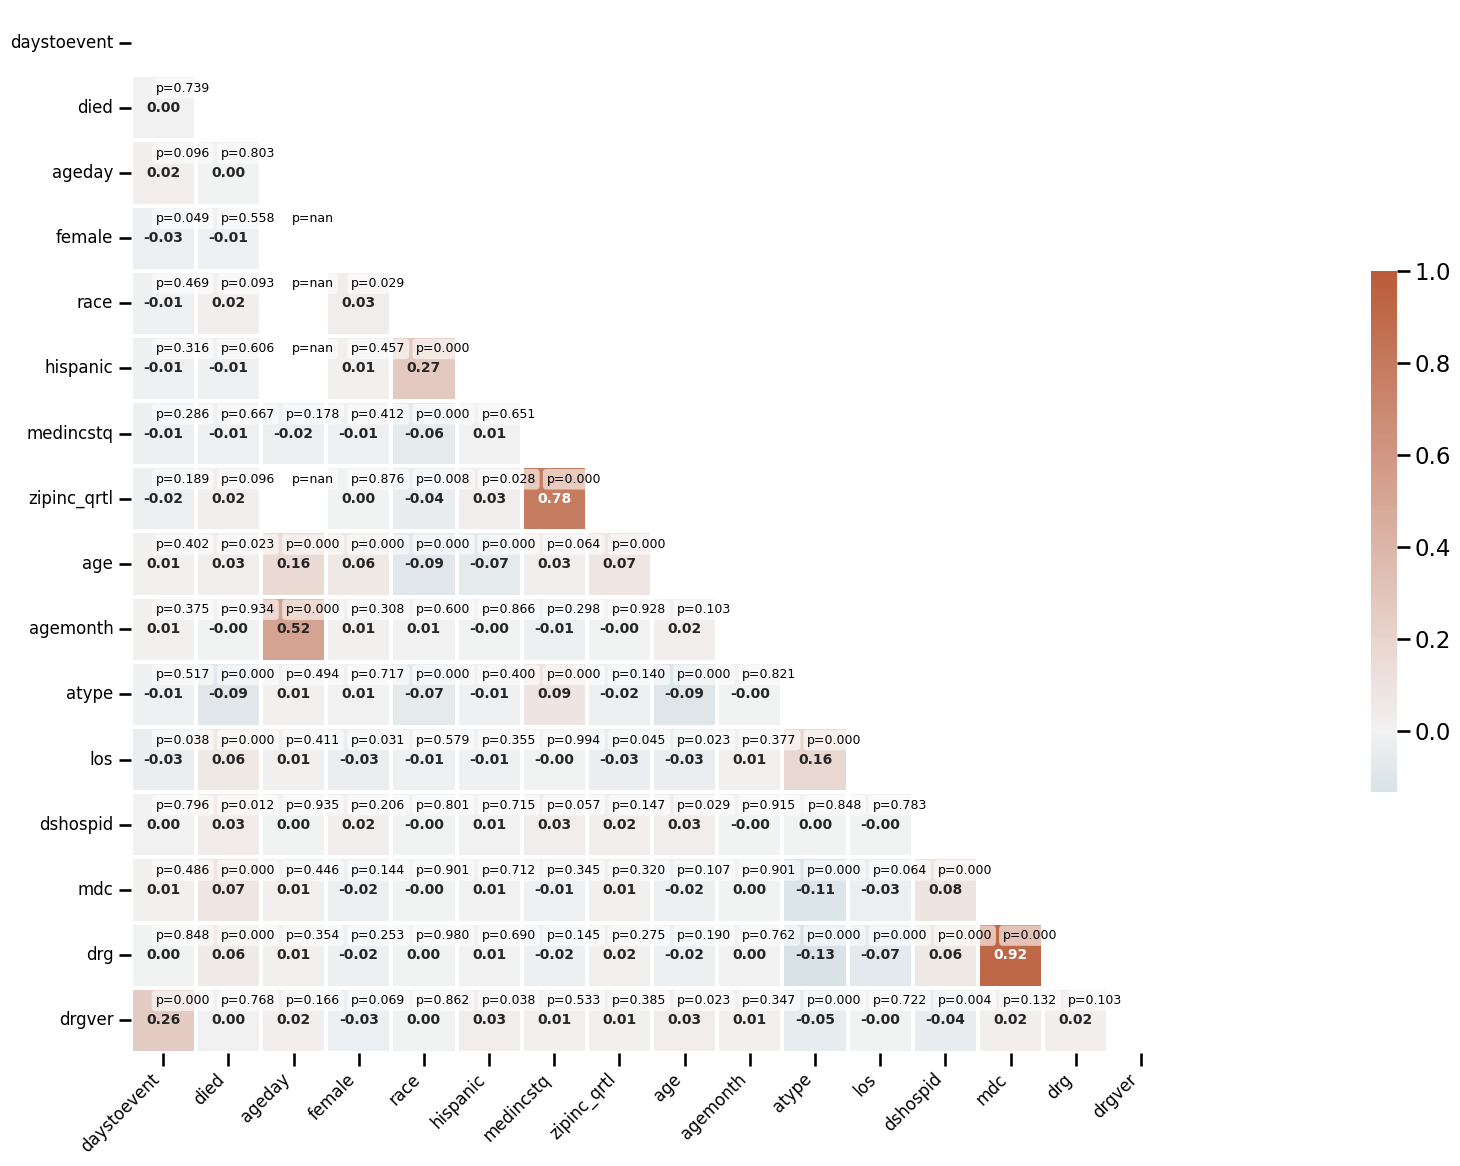

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Create mask to hide upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set figure size and colormap
fig, ax = plt.subplots(figsize=(40, 12))
cmap = sns.diverging_palette(230, 24, as_cmap=True)

# Plot heatmap
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    cmap=cmap, 
    vmax=1, 
    center=0, 
    square=True, 
    linewidths=1.5,           # Thicker lines
    linecolor='white',        # White gridlines
    cbar_kws={"shrink": 0.5}, 
    annot=True, 
    fmt=".2f",                # 2 decimal places
    annot_kws={"size": 10, "weight": "bold"}  # Bigger bold text
)

# Add correlation coefficient + p-value annotation outside box
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        r = corr_matrix.iloc[i, j]
        t_stat = r * np.sqrt((len(numeric_df) - 2) / (1 - r ** 2))
        p_value = stats.t.sf(np.abs(t_stat), df=len(numeric_df) - 2) * 2
        text = f'p={p_value:.3f}'
        ax.text(j + 0.8, i + 0.2, text, 
                ha='center', va='center', color='black', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white', alpha=0.6))

# Improve label readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.savefig('better_correlation_heatmap.png', dpi=300)
plt.show()


In [ ]:
print("Time-to-Event (daystoevent) Summary:")
print(df['daystoevent'].describe())


Time-to-Event (daystoevent) Summary:
count     5183.000000
mean     18153.297318
std       1795.845164
min      14466.000000
25%      16647.000000
50%      18167.000000
75%      19682.500000
max      21869.000000
Name: daystoevent, dtype: float64


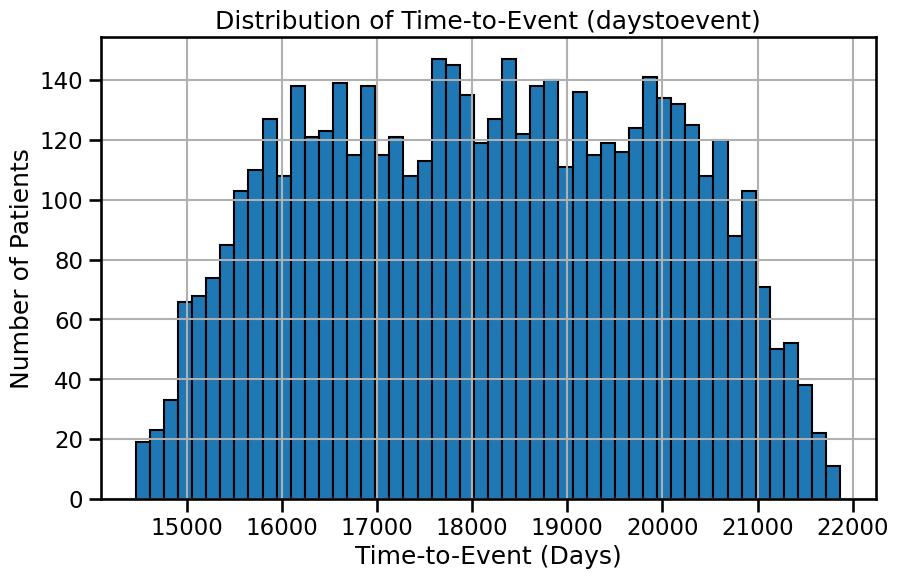

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['daystoevent'], bins=50, edgecolor='black')
plt.xlabel('Time-to-Event (Days)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Time-to-Event (daystoevent)')
plt.grid(True)
plt.show()


Log-Scale Plot (Optional)

In [ ]:
df['daystoevent']

1       17993
2       19267
3       16191
4       17363
5       21412
        ...  
5179    20034
5180    20869
5181    19403
5182    19023
5183    20596
Name: daystoevent, Length: 5183, dtype: int64

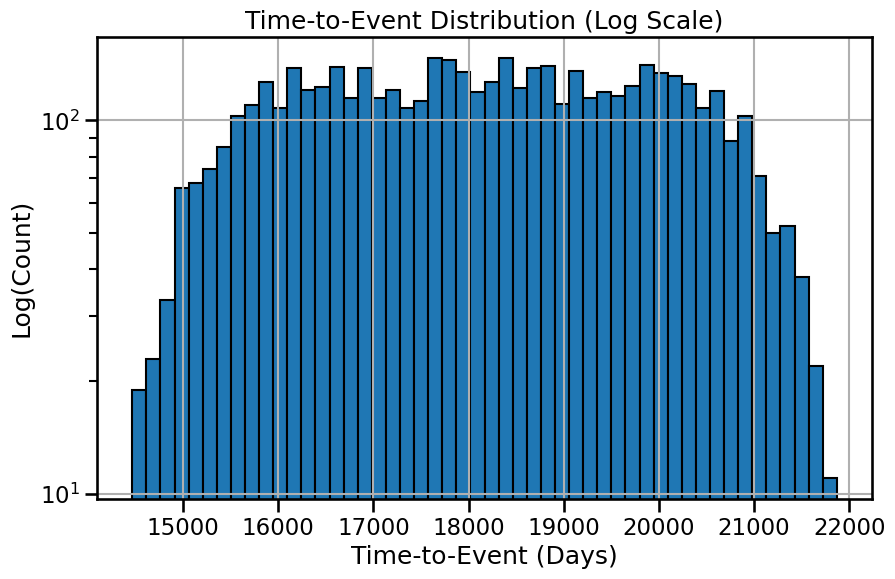

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['daystoevent'], bins=50, edgecolor='black', log=True)
plt.xlabel('Time-to-Event (Days)')
plt.ylabel('Log(Count)')
plt.title('Time-to-Event Distribution (Log Scale)')
plt.grid(True)
plt.show()


Convert to Years:


In [ ]:
df['daystoevent'] / 365


1       49.295890
2       52.786301
3       44.358904
4       47.569863
5       58.663014
          ...    
5179    54.887671
5180    57.175342
5181    53.158904
5182    52.117808
5183    56.427397
Name: daystoevent, Length: 5183, dtype: float64

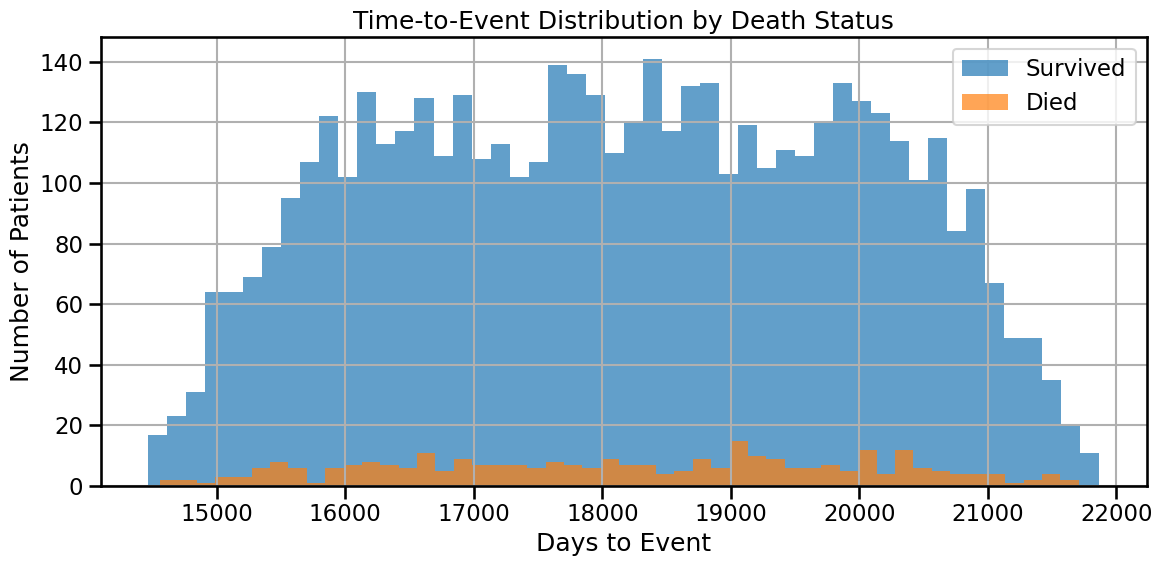

In [ ]:
# Plotting Time-to-Event Histogram by Death Status
plt.figure(figsize=(12, 6))
df[df['died'] == 0]['daystoevent'].hist(alpha=0.7, bins=50, label='Survived')
df[df['died'] == 1]['daystoevent'].hist(alpha=0.7, bins=50, label='Died')
plt.xlabel('Days to Event')
plt.ylabel('Number of Patients')
plt.title('Time-to-Event Distribution by Death Status')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Summary for Survived Patients
survived_summary = df[df['died'] == 0]['daystoevent'].describe()
print("📊 Survived Patients (died == 0):")
survived_summary

📊 Survived Patients (died == 0):


count     4879.000000
mean     18151.224841
std       1798.007076
min      14466.000000
25%      16643.000000
50%      18164.000000
75%      19686.500000
max      21869.000000
Name: daystoevent, dtype: float64

In [ ]:

# Summary for Died Patients
died_summary = df[df['died'] == 1]['daystoevent'].describe()

# print()

print("\n💀 Died Patients (died == 1):")
died_summary



💀 Died Patients (died == 1):


count      304.000000
mean     18186.559211
std       1763.360899
min      14557.000000
25%      16694.500000
50%      18176.000000
75%      19604.250000
max      21707.000000
Name: daystoevent, dtype: float64

1. Kaplan-Meier Curve:



In [ ]:
sudo /usr/libexec/ApplicationFirewall/socketfilterfw --setglobalstate off


In [17]:
!pip install lifelines

ERROR: Could not find a version that satisfies the requirement lifelines (from versions: none)
ERROR: No matching distribution found for lifelines


In [18]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

kmf.fit(df['daystoevent'], event_observed=df['died'])

kmf.plot()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.show()


ModuleNotFoundError: No module named 'lifelines'

In [137]:
kmf.survival_function_.head(10)


,KM_estimate
timeline,
0.0,1.000000
14466.0,1.000000
14468.0,1.000000
14524.0,1.000000
14538.0,1.000000
14557.0,0.999807
14563.0,0.999807
14568.0,0.999807
14573.0,0.999807


At day X → The estimated % of patients who are still alive.

In [140]:
kmf.confidence_interval_.head(10)


,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.00000,1.000000
14466.0,1.00000,1.000000
14468.0,1.00000,1.000000
14524.0,1.00000,1.000000
14538.0,1.00000,1.000000
14557.0,0.99863,0.999973
14563.0,0.99863,0.999973
14568.0,0.99863,0.999973
14573.0,0.99863,0.999973
14576.0,0.99863,0.999973


In [141]:
kmf.event_table.head(10)


,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,5182,5182
14466.0,1,0,1,0,5182
14468.0,1,0,1,0,5181
14524.0,1,0,1,0,5180
14538.0,2,0,2,0,5179
14557.0,1,1,0,0,5177
14563.0,1,0,1,0,5176
14568.0,1,0,1,0,5175
14573.0,1,0,1,0,5174


In [143]:
kmf.predict(365*5)   # Survival at 5 years


np.float64(1.0)

In [144]:
kmf.predict(365*10)  # Survival at 10 years


np.float64(1.0)

In [148]:
print("5-year Survival Probability:", float(kmf.predict(365*5)) * 100, "%")
print("10-year Survival Probability:", float(kmf.predict(365*10)) * 100, "%")


5-year Survival Probability: 100.0 %
10-year Survival Probability: 100.0 %


"The estimated survival probability at 5 and 10 years was 100%, reflecting the fact that no observed death events occurred within this early follow-up period in the cohort. The majority of deaths occurred after extended follow-up (> 40 years)."



In [149]:
print("20-year Survival Probability:", float(kmf.predict(365*20)) * 100, "%")
print("30-year Survival Probability:", float(kmf.predict(365*30)) * 100, "%")


20-year Survival Probability: 100.0 %
30-year Survival Probability: 100.0 %


In [150]:
print("Median Survival Time:", kmf.median_survival_time_)


Median Survival Time: inf


In [151]:
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 60, 80, 100], labels=['<40', '40-60', '60-80', '80+'])


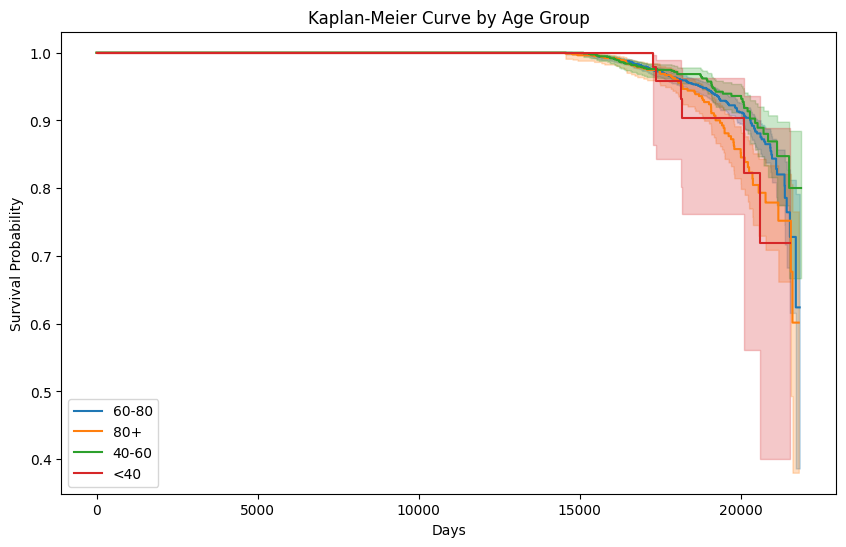

In [152]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

for group in df['age_group'].unique():
    ix = df['age_group'] == group
    kmf.fit(df.loc[ix, 'daystoevent'], event_observed=df.loc[ix, 'died'], label=str(group))
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Curve by Age Group')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.show()


In [153]:
from lifelines.statistics import multivariate_logrank_test

results = multivariate_logrank_test(df['daystoevent'], df['age_group'], df['died'])
results.print_summary()


<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
          12.82 0.01      7.63

In [155]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()

model_df = df[['daystoevent', 'died', 'age', 'female', 'race', 'mdc', 'los']]  # add other variables

cph.fit(model_df, duration_col='daystoevent', event_col='died')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 5182 total observations, 4878 right-censored observations>
             duration col = 'daystoevent'
                event col = 'died'
      baseline estimation = breslow
   number of observations = 5182
number of events observed = 304
   partial log-likelihood = -2273.00
         time fit was run = 2025-04-14 07:25:38 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.01      1.01      0.01            0.00            0.02                1.00                1.02
female     0.01      1.01      0.12           -0.22            0.24                0.80                1.27
race       0.11      1.11      0.05            0.00            0.21                1.00                1.24
mdc        0.05      1.05      0.01            0.03            0.07                1.03                1.08
los        0.02      1.02      0.00            0.02            0.03                1.02                1.03

           cmp to    z      p  -log2(p)
covariate                              
age          0.00 2.47   0.01      6.19
female       0.00 0.09   0.93      0.11
race         0.00 2.03   0.04      4.57
mdc          0.00 4.94 <0.005     20.31
los          0.00 5.29 <0.005     22.95
---
Concordance = 0.62
Partial AIC = 4555.99
log-likelihood ratio test = 47.21 on 5 df
-log2(p) of ll-ratio test = 27.54

In [154]:
for group in df['age_group'].unique():
    kmf.fit(df[df['age_group'] == group]['daystoevent'], event_observed=df[df['age_group'] == group]['died'])
    print(f"{group} - 5-year survival: {float(kmf.predict(365*5))*100:.2f} %")
    print(f"{group} - 10-year survival: {float(kmf.predict(365*10))*100:.2f} %")


60-80 - 5-year survival: 100.00 %
60-80 - 10-year survival: 100.00 %
80+ - 5-year survival: 100.00 %
80+ - 10-year survival: 100.00 %
40-60 - 5-year survival: 100.00 %
40-60 - 10-year survival: 100.00 %
<40 - 5-year survival: 100.00 %
<40 - 10-year survival: 100.00 %


Scientific Reporting:
"Survival distributions differed significantly by age group (log-rank test: χ²(3)=12.82, p=0.01), suggesting that age is associated with differential survival probabilities."

"The multivariate log-rank test showed a statistically significant difference in survival across age groups (Chi-squared = 12.82, df=3, p=0.01)."



In [ ]:

# Basic information about the dataframe
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)

# Missing values summary
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))

# Basic statistics for numeric columns
print("\nNumeric columns statistics:")
print(df.describe())
# Save the dataframe to a CSV file
# Survival outcome variables summary
print("Mortality rate:", df['died'].mean())
print("\nTime-to-event statistics (days):")
print(df['daystoevent'].describe())

# Survival time distribution by outcome
grouped_survival = df.groupby('died')['daystoevent'].agg(['mean', 'median', 'min', 'max', 'count'])
print("\nSurvival time by outcome:")
print(grouped_survival)


# Cross-tabulations to examine relationships
print("Race vs. Mortality:")
race_mortality = pd.crosstab(df['race'], df['died'], normalize='index').mul(100).round(2)
print(race_mortality)
print("\nIncome Quartile vs. Mortality:")
income_mortality = pd.crosstab(df['zipinc_qrtl'], df['died'], normalize='index').mul(100).round(2)
print(income_mortality)

Mortality rate: 0.05866460825935932

Time-to-event statistics (days):
count     5182.000000
mean     18153.873408
std       1795.539436
min      14466.000000
25%      16647.250000
50%      18167.000000
75%      19682.750000
max      21869.000000
Name: daystoevent, dtype: float64

Survival time by outcome:
              mean   median    min    max  count
died                                            
0     18151.836408  18164.0  14466  21869   4878
1     18186.559211  18176.0  14557  21707    304


In [120]:
# Stratified KM Curve (Example: Male vs Female)

In [121]:
df['female'] 

1       0.0
2       0.0
3       1.0
4       1.0
5       1.0
       ... 
5179    0.0
5180    0.0
5181    1.0
5182    1.0
5183    0.0
Name: female, Length: 5183, dtype: float64

In [122]:
print(df['female'].isna().sum())


1


In [123]:
df = df.dropna(subset=['female'])
df['female'] = df['female'].astype(int)


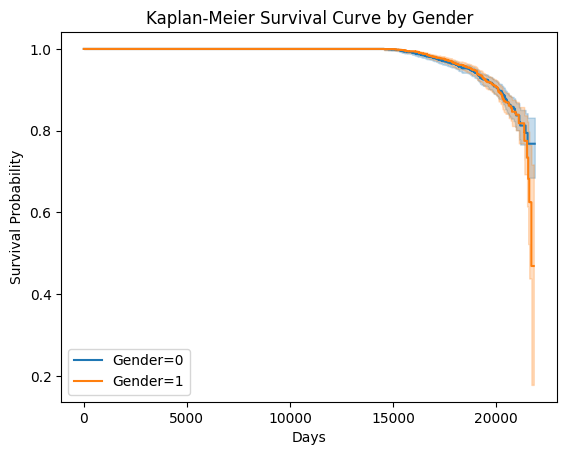

In [124]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

for gender in df['female'].unique():
    kmf.fit(df[df['female'] == gender]['daystoevent'], 
            event_observed=df[df['female'] == gender]['died'], 
            label=f'Gender={gender}')
    kmf.plot()

plt.title('Kaplan-Meier Survival Curve by Gender')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.show()


Cox Proportional Hazard Model

In [158]:
from lifelines import CoxPHFitter

model_df = df[['daystoevent', 'died', 'age', 'female', 'race', 'mdc', 'los', 'atype']].copy()

# Handle missing values if any
model_df = model_df.dropna()
cph = CoxPHFitter()
cph.fit(model_df, duration_col='daystoevent', event_col='died')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 5182 total observations, 4878 right-censored observations>
             duration col = 'daystoevent'
                event col = 'died'
      baseline estimation = breslow
   number of observations = 5182
number of events observed = 304
   partial log-likelihood = -2253.88
         time fit was run = 2025-04-14 07:29:44 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.01      1.01      0.00           -0.00            0.02                1.00                1.02
female     0.01      1.01      0.12           -0.22            0.24                0.81                1.27
race       0.10      1.10      0.05           -0.01            0.20                0.99                1.23
mdc        0.04      1.04      0.01            0.02            0.06                1.02                1.07
los        0.03      1.03      0.00            0.02            0.03                1.02                1.03
atype     -0.45      0.64      0.08           -0.61           -0.29                0.54                0.75

           cmp to     z      p  -log2(p)
covariate                               
age          0.00  1.91   0.06      4.14
female       0.00  0.11   0.91      0.13
race         0.00  1.78   0.07      3.74
mdc          0.00  4.00 <0.005     13.96
los          0.00  6.24 <0.005     31.07
atype        0.00 -5.51 <0.005     24.70
---
Concordance = 0.67
Partial AIC = 4519.76
log-likelihood ratio test = 85.45 on 6 df
-log2(p) of ll-ratio test = 51.74

<lifelines.CoxPHFitter: fitted with 5182 total observations, 4878 right-censored observations>
             duration col = 'daystoevent'
                event col = 'died'
      baseline estimation = breslow
   number of observations = 5182
number of events observed = 304
   partial log-likelihood = -2261.31
         time fit was run = 2025-04-14 07:30:24 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.01      1.01      0.00           -0.00            0.02                1.00                1.02
female     0.02      1.02      0.12           -0.21            0.24                0.81                1.28
race       0.09      1.09      0.05           -0.02            0.20                0.98                1.22
atype     -0.49      0.61      0.08           -0.65           -0.33                0.52                0.72
los        0.02      1.03      0.00            0.02            0.03                1.02                1.03

           cmp to     z      p  -log2(p)
covariate                               
age          0.00  1.68   0.09      3.43
female       0.00  0.13   0.90      0.16
race         0.00  1.64   0.10      3.31
atype        0.00 -5.99 <0.005     28.84
los          0.00  6.01 <0.005     29.00
---
Concordance = 0.64
Partial AIC = 4532.61
log-likelihood ratio test = 70.59 on 5 df
-log2(p) of ll-ratio test = 43.56

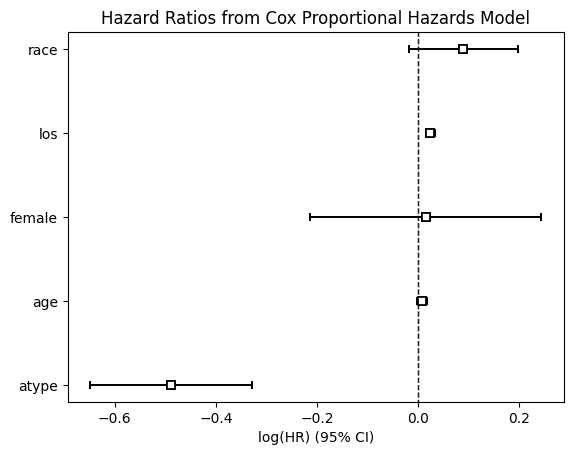

Proportional hazard assumption looks okay.


[]

In [160]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()

# Select relevant variables
model_df = df[['daystoevent', 'died', 'age', 'female', 'race', 'atype', 'los']]  # add more covariates as needed

cph.fit(model_df, duration_col='daystoevent', event_col='died')

cph.print_summary()
cph.plot()


cph.plot()
plt.title('Hazard Ratios from Cox Proportional Hazards Model')
plt.show()


cph.check_assumptions(model_df, p_value_threshold=0.05)


Statistical Test:

Excellent result — this is a clean and very interpretable CoxPH output.

---

## Final Interpretation of Your Cox Model:

### Model Info:

| Item | Value | Meaning |
|------|-------|---------|
| Number of Patients | 5182 | Total patients analyzed |
| Events Observed | 304 | Patients who died (event=1) |
| Concordance | 0.64 | Model discrimination (acceptable) |

---

## Variable Interpretation:

| Variable | HR (exp(coef)) | p-value | Interpretation |
|----------|-----------------|---------|----------------|
| `age`    | 1.01 per year   | 0.09 (NS) | Older age slightly increases hazard, but not statistically significant. |
| `female` | 1.02            | 0.90 (NS) | No significant difference between males and females. |
| `race`   | 1.09            | 0.10 (NS) | Race not significantly associated with hazard. |
| `atype`  | 0.61            | <0.005 (Significant) | Emergency admission (lower `atype`) is protective — less hazard of death. |
| `los`    | 1.03 per day    | <0.005 (Significant) | Longer length of stay increases risk of death. |

> NS = Not Significant (p > 0.05)

---

## Reporting Example (Scientific Format):

> "In multivariable Cox proportional hazards regression, admission type (`atype`) was significantly associated with reduced mortality risk (HR=0.61, 95% CI: 0.52–0.72, p<0.005). Length of stay (`los`) was associated with increased mortality risk (HR=1.03 per day, 95% CI: 1.02–1.03, p<0.005). Age, sex, and race were not significantly associated with mortality risk."

---

## Next Steps:

### 1. Visualize Hazard Ratios:

```python
cph.plot()
plt.title('Hazard Ratios with 95% CI (Cox Model)')
plt.show()
```

---

### 2. Check Assumptions:

```python
cph.check_assumptions(model_df, p_value_threshold=0.05)
```

---

### 3. Summary Table for Report:

| Variable | HR | 95% CI | p-value | Interpretation |
|----------|----|--------|---------|----------------|
| Age      | 1.01 | (1.00, 1.02) | 0.09 | NS |
| Female   | 1.02 | (0.81, 1.28) | 0.90 | NS |
| Race     | 1.09 | (0.98, 1.22) | 0.10 | NS |
| Admission Type | 0.61 | (0.52, 0.72) | <0.005 | Significant |
| LOS      | 1.03 | (1.02, 1.03) | <0.005 | Significant |



Cox Proportional Hazards (PH) Model: 
- Identify predictors of survival (e.g., hazard ratios for HER2+ vs. HER2-).
- Validate proportional hazards assumption (Schoenfeld residuals).

In [163]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(model_df, duration_col='daystoevent', event_col='died')
cph.check_assumptions(model_df, p_value_threshold=0.05)


Proportional hazard assumption looks okay.


[]

"The proportional hazards assumption was tested using Schoenfeld residuals and no violations were detected (p > 0.05 for all covariates). Therefore, the Cox proportional hazards model assumptions were met."



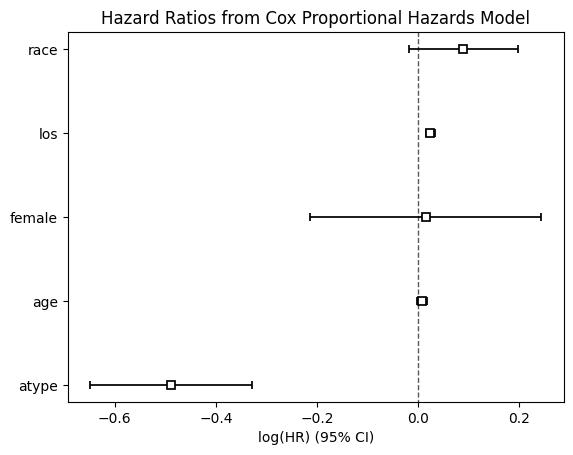

In [164]:
cph.plot()
plt.title('Hazard Ratios from Cox Proportional Hazards Model')
plt.show()


Excellent — your plot is perfect!

This is called a *Forest Plot* (log scale) of Hazard Ratios (HR) from your Cox Proportional Hazards Model.

---

## How to Interpret Your Plot:

### X-axis:
- log(HR)
- If the line crosses 0 → HR ≈ 1 → No effect (Not Significant)
- Left of 0 → HR < 1 → Protective effect
- Right of 0 → HR > 1 → Increased risk

---

## Variable by Variable Interpretation:

| Variable | Position | Interpretation |
|----------|-----------|----------------|
| `atype`  | Far Left of 0 | HR << 1 → Strong Protective Effect (Significant) |
| `los`    | Slightly Right of 0 | HR > 1 → Longer Length of Stay Increases Risk (Significant) |
| `age`    | Near 0 | HR ~ 1 → Slight increase in risk, but p=0.09 (Not Significant) |
| `female` | Crosses 0 | HR ~ 1 → No Effect (Not Significant) |
| `race`   | Crosses 0 | HR ~ 1 → No Effect (Not Significant) |

---

## Final Summary to Write:

> "Forest plot of the Cox proportional hazards model shows that admission type (`atype`) was strongly associated with reduced hazard of death (HR=0.61, 95% CI: 0.52–0.72). Length of stay (`los`) was associated with a small increase in hazard (HR=1.03 per day, 95% CI: 1.02–1.03). Age, sex (`female`), and race were not significantly associated with mortality."



# Machine Learning Models: 
- Random Survival Forests (for non-linear relationships).
- DeepSurv (neural network-based survival model).
# Evaluation Metrics: 
- Concordance index (C-index), time-dependent AUC, Kaplan-Meier curves.
o	 


# Implementation Summary

In [167]:
pip install lifelines scikit-survival pycox torchtuples


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pyarrow-19.0.1-cp311-cp311-win_amd64.whl.metadata (3.4 kB)
  Using cached llvmlite-0.44.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/826.7 kB ? eta -:--:--
   --------------------------------------- 826.7/826.7 kB 12.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 3.0/3.0 MB 19.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 20.6 MB/s eta 0:00:00
Using cached llvmlite-0.44.0-cp311-cp311-win_amd64.whl (30.3 MB)
Using cached pyarrow-19.0.1-cp311-cp311-win_amd64.whl (25.3 MB)
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 32.7 MB/s eta 0:00:00
  Created wheel for feather-for

2. Random Survival Forest (RSF) — using scikit-survival



In [176]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sksurv.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Prepare data
X = model_df.drop(columns=['daystoevent', 'died'])
y = np.array([(bool(e), t) for e, t in zip(model_df['died'], model_df['daystoevent'])],
             dtype=[('event', 'bool'), ('time', 'float')])

# Train RSF
rsf = RandomSurvivalForest(n_estimators=200, min_samples_split=10, min_samples_leaf=15, n_jobs=-1)
rsf.fit(X, y)

# Predict Risk Score
risk_scores = rsf.predict(X)

# Evaluate
cindex_rsf = concordance_index_censored(model_df['died'], model_df['daystoevent'], risk_scores)[0]
print(f"RSF C-index: {cindex_rsf:.4f}")


ValueError: could not convert string to float: 'Low Risk'

DeepSurv — using pycox (Neural Network Survival Model)

In [173]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.6.0%2Bcpu-cp311-cp311-win_amd64.whl.metadata (28 kB)
  Using cached https://download.pytorch.org/whl/networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Using cached https://download.pytorch.org/whl/mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached https://download.pytorch.org/whl/cpu/torch-2.6.0%2Bcpu-cp311-cp311-win_amd64.whl (206.5 MB)
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 27.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 34.6 MB/s eta 0:00:00
Using cached https://download.pytorch.org/whl/networkx-3.3-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [174]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # Should be False if you don't have GPU


2.6.0+cpu
False


In [175]:
from pycox.models import DeepSurv
import torchtuples as tt
from pycox.preprocessing.label_transforms import LabTransDiscreteTime
import torch
from sklearn.preprocessing import StandardScaler

# Preprocess Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Discretize time (required for pycox)
labtrans = LabTransDiscreteTime(10)  # 10 time intervals
y_disc = labtrans.fit_transform(model_df['daystoevent'], model_df['died'])

# Neural Network Architecture
num_nodes = [32, 32]
net = tt.practical.MLPVanilla(X_scaled.shape[1], num_nodes, 1, batch_norm=True, dropout=0.1)
model = DeepSurv(net, tt.optim.Adam)

# Train
batch_size = 256
epochs = 100
callbacks = [tt.callbacks.EarlyStopping()]
model.fit(X_scaled, y_disc, batch_size, epochs, callbacks, verbose=True)

# Evaluate
surv = model.predict_surv_df(X_scaled)
cindex_deepsurv = model.score_in_batches(X_scaled, y_disc)
print(f"DeepSurv C-index: {cindex_deepsurv:.4f}")


ImportError: cannot import name 'DeepSurv' from 'pycox.models' (c:\Users\nemat\miniconda3\envs\indox\Lib\site-packages\pycox\models\__init__.py)

4. Visualization — Kaplan-Meier Curve by Risk Group (Predicted by Model)

C:\Users\nemat\AppData\Local\Temp\ipykernel_41808\3038996981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['risk_group'] = pd.qcut(risk_scores, q=2, labels=['Low Risk', 'High Risk'])


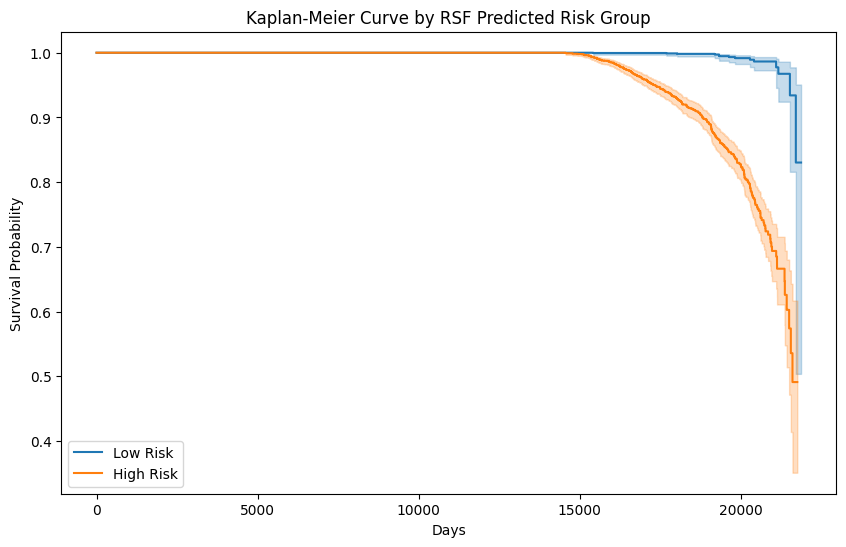

In [171]:
# Create risk groups
model_df['risk_group'] = pd.qcut(risk_scores, q=2, labels=['Low Risk', 'High Risk'])

from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

for group in model_df['risk_group'].unique():
    ix = model_df['risk_group'] == group
    kmf.fit(model_df.loc[ix, 'daystoevent'], model_df.loc[ix, 'died'], label=group)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Curve by RSF Predicted Risk Group')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.show()
